In [44]:
f = open("text1.txt","r")
content = f.read()
print(content)
path_online_source = "summarized_from_online_source.txt"
path_model_source = "summary_from_model.txt"
text_path = "text1.txt"

AI will play a vital role in the healthcare sector for diagnosing diseases quickly and more accurately. New drug discovery will be faster and cost-effective with the help of AI. It will also enhance the patient engagement in their care and also make ease appointment scheduling, bill paying, with fewer errors. However, apart from these beneficial uses, one great challenge of AI in healthcare is to ensure its adoption in daily clinical practices. From patient self-service to chat bots, computer-aided detection (CAD) systems for diagnosis, and image data analysis to identify candidate molecules in drug discovery, AI is already at work increasing convenience and efficiency, reducing costs and errors, and generally making it easier for more patients to receive the health care they need.While NLP and ML are already being used in health care, they will become increasingly important for their potential to:Improve provider and clinician productivity and quality of care, Enhance patient engageme

In [45]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sahsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sahsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
# Tokenizing the text

stopWords = set(stopwords.words("english"))
words = word_tokenize(content)
print(stopWords)
print()
print(words)

{'more', 'here', 'has', 'and', 'theirs', 'from', 'why', 're', 'being', 'with', 'your', 'shan', "won't", "you'll", 'ma', 'all', 'yours', 'them', 'can', "needn't", 'herself', 'had', "doesn't", "isn't", 'because', 's', 'wouldn', 'at', 'hadn', 'weren', 'the', 'an', 'out', 'same', 'up', 'own', 'who', 'been', "you're", 'did', 'am', "you've", 'for', 'too', 'how', "haven't", "wouldn't", 'themselves', 'my', 'as', 'once', 'no', 'don', 'of', 'than', 'she', 'during', 'most', 'each', 'o', 'whom', 'itself', 'd', "mightn't", 'only', 'myself', "you'd", 'do', "hadn't", 'against', "it's", 'not', 'until', 'any', 'll', 'very', 'down', "aren't", 'didn', 'shouldn', "shouldn't", 'now', 'doing', 'between', 'over', "should've", 'mustn', "wasn't", 'was', 'if', 'or', 'off', 'me', "didn't", 'he', "she's", 'a', 'were', 'below', 'yourself', 'just', 'm', 'having', 'will', 'it', 'that', 'when', 'their', "don't", 'is', 'while', 'few', 'his', 'should', 'mightn', 've', 'y', 'what', 'by', 'about', 'under', 'himself', 'th

In [47]:
# Creating a frequency table to keep the 
# score of each word
   
freqTable = dict()
for word in words:
    word = word.lower()
    if word in stopWords:
        continue
    if word in freqTable:
        freqTable[word] += 1
    else:
        freqTable[word] = 1

In [48]:
print(freqTable)

{'ai': 4, 'play': 1, 'vital': 1, 'role': 1, 'healthcare': 2, 'sector': 1, 'diagnosing': 1, 'diseases': 1, 'quickly': 1, 'accurately': 1, '.': 5, 'new': 2, 'drug': 2, 'discovery': 2, 'faster': 1, 'cost-effective': 1, 'help': 1, 'also': 2, 'enhance': 2, 'patient': 4, 'engagement': 2, 'care': 6, 'make': 1, 'ease': 1, 'appointment': 1, 'scheduling': 1, ',': 13, 'bill': 1, 'paying': 1, 'fewer': 1, 'errors': 2, 'however': 1, 'apart': 1, 'beneficial': 1, 'uses': 1, 'one': 1, 'great': 1, 'challenge': 1, 'ensure': 1, 'adoption': 1, 'daily': 1, 'clinical': 2, 'practices': 1, 'self-service': 1, 'chat': 1, 'bots': 1, 'computer-aided': 1, 'detection': 1, '(': 1, 'cad': 1, ')': 1, 'systems': 1, 'diagnosis': 1, 'image': 1, 'data': 2, 'analysis': 1, 'identify': 1, 'candidate': 1, 'molecules': 1, 'already': 2, 'work': 1, 'increasing': 1, 'convenience': 1, 'efficiency': 1, 'reducing': 1, 'costs': 1, 'generally': 1, 'making': 1, 'easier': 1, 'patients': 1, 'receive': 1, 'health': 2, 'need.while': 1, 'nlp

In [49]:
# Creating a dictionary to keep the score of each sentence
sentences = sent_tokenize(content)
sentenceValue = dict()
   
for sentence in sentences:
    for word, freq in freqTable.items():
        if word in sentence.lower():
            if sentence in sentenceValue:
                sentenceValue[sentence] += freq
            else:
                sentenceValue[sentence] = freq
   

In [50]:
print(sentenceValue)


{'AI will play a vital role in the healthcare sector for diagnosing diseases quickly and more accurately.': 28, 'New drug discovery will be faster and cost-effective with the help of AI.': 19, 'It will also enhance the patient engagement in their care and also make ease appointment scheduling, bill paying, with fewer errors.': 43, 'However, apart from these beneficial uses, one great challenge of AI in healthcare is to ensure its adoption in daily clinical practices.': 45, 'From patient self-service to chat bots, computer-aided detection (CAD) systems for diagnosis, and image data analysis to identify candidate molecules in drug discovery, AI is already at work increasing convenience and efficiency, reducing costs and errors, and generally making it easier for more patients to receive the health care they need.While NLP and ML are already being used in health care, they will become increasingly important for their potential to:Improve provider and clinician productivity and quality of 

In [51]:
sumValues = 0
for sentence in sentenceValue:
    sumValues += sentenceValue[sentence]
   

In [52]:
# Average value of a sentence from the original text
   
average = int(sumValues / len(sentenceValue))
   
# Storing sentences into our summary.
summary = ''
for sentence in sentences:
    if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.2 * average)):
        summary += " " + sentence
print(summary)

 From patient self-service to chat bots, computer-aided detection (CAD) systems for diagnosis, and image data analysis to identify candidate molecules in drug discovery, AI is already at work increasing convenience and efficiency, reducing costs and errors, and generally making it easier for more patients to receive the health care they need.While NLP and ML are already being used in health care, they will become increasingly important for their potential to:Improve provider and clinician productivity and quality of care, Enhance patient engagement in their own care and streamline patient access to care , Accelerate the speed and reduce the cost to develop new pharmaceutical treatments  and Personalize medical treatments by leveraging analytics to mine significant, previously untapped stores of non-codified clinical data.


In [53]:
len(summary)

833

In [54]:
import spacy

In [55]:
nlp = spacy.load("en_core_web_sm")

In [56]:
doc = nlp(summary)

In [57]:
print(doc)

 From patient self-service to chat bots, computer-aided detection (CAD) systems for diagnosis, and image data analysis to identify candidate molecules in drug discovery, AI is already at work increasing convenience and efficiency, reducing costs and errors, and generally making it easier for more patients to receive the health care they need.While NLP and ML are already being used in health care, they will become increasingly important for their potential to:Improve provider and clinician productivity and quality of care, Enhance patient engagement in their own care and streamline patient access to care , Accelerate the speed and reduce the cost to develop new pharmaceutical treatments  and Personalize medical treatments by leveraging analytics to mine significant, previously untapped stores of non-codified clinical data.


In [58]:
summary_length = len(doc)
print(summary_length)

144


In [59]:

#reading summary obtained from online sources
with open (path_online_source, "r") as f:
    data = f.read()



In [60]:
# summarized = nlp(data)

In [61]:
print(data)

However, apart from these beneficial uses, one great challenge of AI in healthcare is to ensure its adoption in daily clinical practices.  From patient self-service to chat bots, computer-aided detection (CAD) systems for diagnosis, and image data analysis to identify candidate molecules in drug discovery, AI is already at work increasing convenience and efficiency, reducing costs and errors, and generally making it easier for more patients to receive the health care they need. While NLP and ML are already being used in health care, they will become increasingly important for their potential to:Improve provider and clinician productivity and quality of care, Enhance patient engagement in their own care and streamline patient access to care , Accelerate the speed and reduce the cost to develop new pharmaceutical treatments  and Personalize medical treatments by leveraging analytics to mine significant, previously untapped stores of non-codified clinical data. 



In [62]:
f.close()

In [63]:
summarized = nlp(data)

In [64]:
print(summarized)

However, apart from these beneficial uses, one great challenge of AI in healthcare is to ensure its adoption in daily clinical practices.  From patient self-service to chat bots, computer-aided detection (CAD) systems for diagnosis, and image data analysis to identify candidate molecules in drug discovery, AI is already at work increasing convenience and efficiency, reducing costs and errors, and generally making it easier for more patients to receive the health care they need. While NLP and ML are already being used in health care, they will become increasingly important for their potential to:Improve provider and clinician productivity and quality of care, Enhance patient engagement in their own care and streamline patient access to care , Accelerate the speed and reduce the cost to develop new pharmaceutical treatments  and Personalize medical treatments by leveraging analytics to mine significant, previously untapped stores of non-codified clinical data. 



In [65]:
online_length = len(summarized)
print(online_length)

170


In [66]:
import numpy as np 
import matplotlib.pyplot as plt 

In [67]:
x =[online_length]

In [68]:
y = [summary_length]

In [69]:
X_axis = np.arange(1)

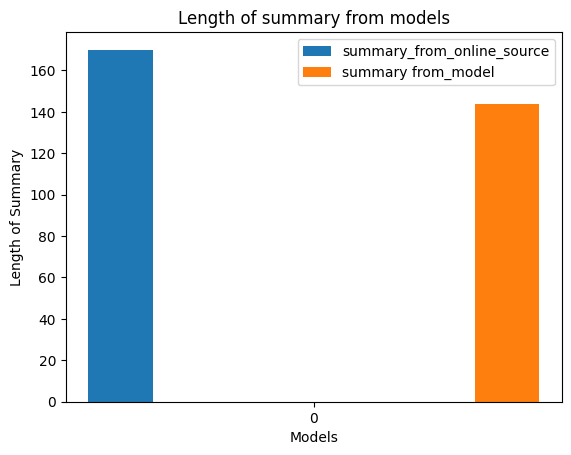

In [70]:
plt.bar(X_axis - 0.3, x, 0.1, label = 'summary_from_online_source')
plt.bar(X_axis + 0.3, y, 0.1, label = 'summary from_model')
plt.xticks(X_axis)
plt.xlabel("Models")
plt.ylabel("Length of Summary")
plt.title("Length of summary from models")
plt.legend()
plt.show()

In [71]:
import math
import string
import sys
  

In [72]:
# reading the text file
# This function will return a list of the lines of text  in the file.
def read_file(filename): 
      
    try:
        with open(filename, 'r') as f:
            data = f.read()
        return data
      
    except IOError:
        print("Error opening or reading input file: ", filename)
        sys.exit()

In [73]:
# splitting the text lines into words
# translation table is a global variable mapping upper case to lower case and punctuation to spaces
translation_table = str.maketrans(string.punctuation+string.ascii_uppercase,
                                     " "*len(string.punctuation)+string.ascii_lowercase)

In [74]:
# returns a list of the words in the file
def get_words_from_line_list(text): 
      
    text = text.translate(translation_table)
    word_list = text.split()
      
    return word_list

In [75]:
# counts frequency of each word returns a dictionary which maps the words to  their frequency.
def count_frequency(word_list): 
      
    D = {}
      
    for new_word in word_list:
          
        if new_word in D:
            D[new_word] = D[new_word] + 1
              
        else:
            D[new_word] = 1
              
    return D

In [76]:
# returns dictionary of (word, frequency) pairs from the previous dictionary.
def word_frequencies_for_file(filename): 
      
    line_list = read_file(filename)
    word_list = get_words_from_line_list(line_list)
    freq_mapping = count_frequency(word_list)
  
    print("File", filename, ":", )
    print(len(line_list), "lines, ", )
    print(len(word_list), "words, ", )
    print(len(freq_mapping), "distinct words")
  
    return freq_mapping
  

In [77]:
# returns the dot product of two documents
def dotProduct(D1, D2): 
    Sum = 0.0
      
    for key in D1:
          
        if key in D2:
            Sum += (D1[key] * D2[key])
              
    return Sum

In [78]:
# returns the angle in radians between document vectors
def vector_angle(D1, D2): 
    numerator = dotProduct(D1, D2)
    denominator = math.sqrt(dotProduct(D1, D1)*dotProduct(D2, D2))
      
    return math.acos(numerator / denominator)

In [79]:
def documentSimilarity(filename_1, filename_2):
    
    sorted_word_list_1 = word_frequencies_for_file(filename_1)
    sorted_word_list_2 = word_frequencies_for_file(filename_2)
    distance = vector_angle(sorted_word_list_1, sorted_word_list_2)
      
    print("The distance between the documents is: % 0.6f (radians)"% distance)
      

In [80]:
with open (path_model_source, "a") as f:
    f.write(summary)

In [81]:
f.close()